# Solver

## Config file

In [1]:
from pathlib import Path
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HERE = Path(os.getcwd()) # Path(__file__) won't work in Jupyter
HERE

PosixPath('/home/hangman/Documents/solver')

In [2]:
with open(HERE / 'config' / 'settings.yaml.bak') as f:
    config = yaml.safe_load(f)
config

{'time_end': 3,
 'time_step': 0.05,
 'f_0': 2,
 'mass': 1.0,
 'viscosity': 1.0,
 'ft_fname': 'f_t.csv',
 'area_fname': 'area.csv'}

In [3]:
new_config = {
    'time_end'  : 3,
    'time_step' : 0.05,
    'f_0'       : 0,
    'mass'      : 10,
    'viscosity' : 10,
    'ft_fname'  : 'f_t.csv',
    'area_fname': 'area.csv',
}

In [4]:
with open(HERE / 'config' / 'settings.yaml', 'w') as f:
    yaml.dump(new_config, f)

## Simulation

`cargo run` will read `config/settings.yaml` and produce:

- `result/`
  - `<config["area_fname"]>.csv`
  - `<config["ft_fname"]>.csv`

In [5]:
!cargo run

   Compiling solver v0.1.0 (/home/hangman/Documents/solver)
    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.31s    
     Running `target/debug/solver`
Solver { time_end: 3.0, time_step: 0.05, f_0: 0.0, mass: 10.0, viscosity: 10.0, gravity: 9.8 }

=== Final Values f(3) ===
Analytical solution: 9.312087
Euler method:        9.371090
Trapezoidal method:  9.335269

=== Integrals ∫f(t)dt from 0 to 3 ===
Analytical integral:           20.087898
Euler ODE + Trap integration:  20.753191
Trap ODE + Trap integration:   20.548744



## Plot

In [ ]:
def plot_data(df) -> plt:
    plt.plot(
        df["timestamp"], df["analytical"],
        label="analytical",
        color="green"
    )
    plt.plot(
        df["timestamp"], df["euler"],
        label="euler",
        color="blue",
        linestyle="--"
    )
    plt.plot(
        df["timestamp"], df["trapezoid"],
        label="trapezoid",
        color="orange",
        linestyle=":"
    )
    plt.legend()
    return plt

### $f(t)$ (1st integral)

In [7]:
ft_df = pd.read_csv(
    HERE / "result" / "f_t.csv",
)
ft_df

,timestamp,euler,trapezoid,analytical
0,0.000000,0.000000,0.000000,0.000000
1,0.050000,0.490000,0.477750,0.477951
2,0.100000,0.955500,0.932210,0.932593
3,0.150000,1.397725,1.364515,1.365062
4,0.200000,1.817839,1.775744,1.776439
...,...,...,...,...
57,2.849998,9.273411,9.232426,9.233125
58,2.899998,9.299740,9.260095,9.260772
59,2.949998,9.324753,9.286415,9.287070
60,2.999998,9.348515,9.311452,9.312086


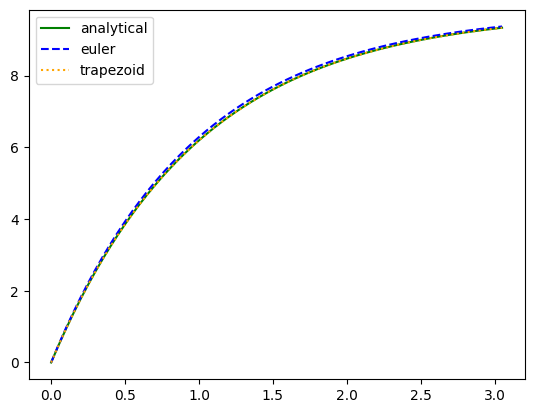

In [8]:
plot_data(ft_df).show()

### area (2nd integral)

In [9]:
area_df = pd.read_csv(
    HERE / "result" / "area.csv",
)
area_df

,timestamp,euler,trapezoid,analytical
0,0.000000,0.000000,0.000000,0.000000
1,0.050000,0.012250,0.011944,0.000000
2,0.100000,0.048388,0.047193,0.012049
3,0.150000,0.107218,0.104611,0.047407
4,0.200000,0.187607,0.183117,0.104938
...,...,...,...,...
57,2.849998,18.888428,18.691654,18.235924
58,2.899998,19.352757,19.153967,18.696861
59,2.949998,19.818369,19.617630,19.159214
60,2.999998,20.285200,20.082577,19.622913


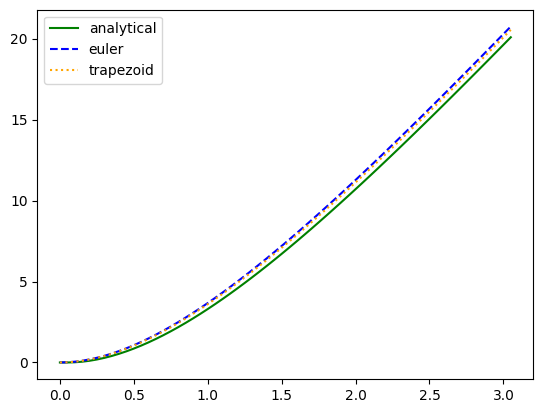

In [10]:
plot_data(area_df).show()